In [1]:
import pandas as pd
import os

file_path = "C:/Users/Anshula Sridhar/Desktop/US_Accidents_March23.csv"

# Check if file exists
if os.path.exists(file_path):
    print("File found! Proceeding to load...")
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    print("Dataset Preview:")
    print(df.head())  # Display first 5 rows
else:
    print("File not found! Please check the file path.")


File found! Proceeding to load...
File loaded successfully!
Dataset Preview:
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Sign

In [2]:
# Load the dataset with error handling
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')
    # Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  Fal

In [3]:
# Step 3: Inspect the Dataset
print("\nDataset Information:")
print(df.info())

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 

In [4]:
# Step 4: Data Cleaning
# Remove rows with missing critical data
df_cleaned = df.dropna(subset=['Start_Time', 'End_Time', 'Weather_Condition'])

# Drop irrelevant columns (optional)
columns_to_drop = ['ID', 'Description']  # Drop these columns if not needed
df_cleaned = df_cleaned.drop(columns=columns_to_drop, axis=1, errors='ignore')

# Confirm data cleaning
print("\nCleaned Dataset Information:")
print(df_cleaned.info())


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 7554935 entries, 0 to 7728393
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Country                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Weather_Timestamp      object 
 18  Temperature(F)         float64
 19  Wind_Chill(F)          float64
 20  Humidity(%)            float64
 21  Pressure(in)           float6

In [7]:
# Step 3: Convert Start_Time to datetime
try:
    # Parse datetime while handling trailing zeros or inconsistencies
    df_cleaned['Start_Time'] = pd.to_datetime(df_cleaned['Start_Time'], errors='coerce')
    print("Start_Time column successfully converted to datetime.")
except Exception as e:
    print(f"Error while converting Start_Time: {e}")

# Drop rows where Start_Time could not be converted
df_cleaned = df_cleaned.dropna(subset=['Start_Time'])

Start_Time column successfully converted to datetime.


In [8]:
# Step 4: Extract Hour from Start_Time
df_cleaned['Hour'] = df_cleaned['Start_Time'].dt.hour

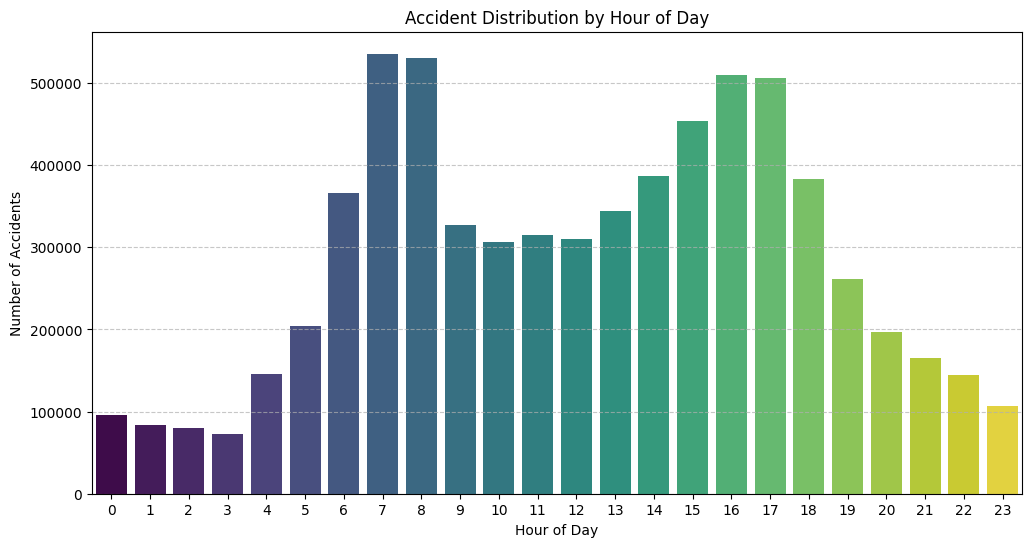

In [24]:
# Step 5: Analyze Accidents by Time of Day
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='Hour', data=df_cleaned, palette='viridis', legend=False)

plt.title('Accident Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))  # Ensure ticks are 0-23
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Save the plot to an image file
plt.savefig(r'C:/Users/Anshula Sridhar/Desktop/accident_distribution_by_hour.png', bbox_inches='tight')  # Save the plot

plt.show()

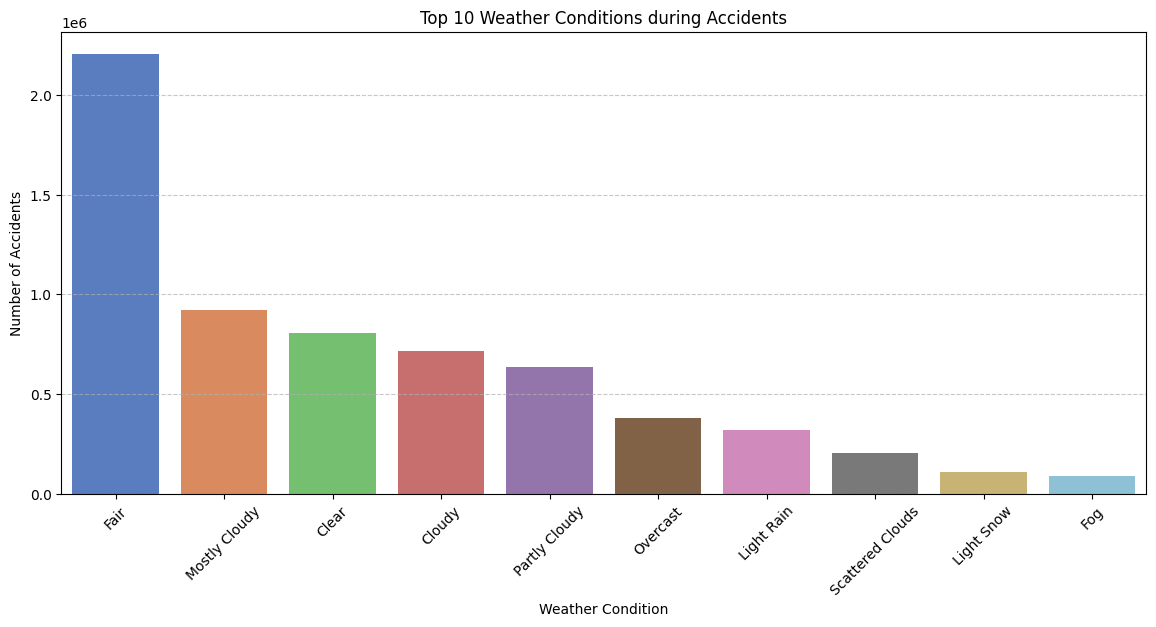

In [23]:
# Step 6: Analyze Accidents by Weather Condition
plt.figure(figsize=(14, 6))
top_weather_conditions = df_cleaned['Weather_Condition'].value_counts().head(10)
sns.barplot(x=top_weather_conditions.index, y=top_weather_conditions.values, hue=top_weather_conditions.index, palette='muted', legend=False)

plt.title('Top 10 Weather Conditions during Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


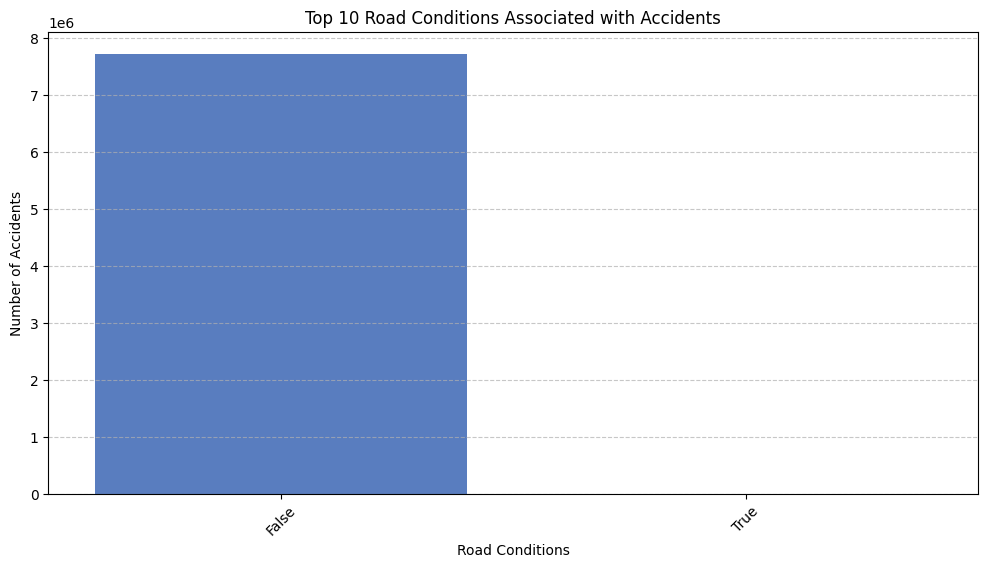

In [20]:
# Check column names
print(df.columns)  # Verify the column names

# Step 2: Analyze accidents by a relevant column related to road condition (e.g., 'Bump')
# For example, using 'Bump' column
road_condition_counts = df['Bump'].value_counts().head(10)  # Adjust column name if needed

# Step 3: Plot accidents by road condition with updated sns.barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=road_condition_counts.index, y=road_condition_counts.values, hue=road_condition_counts.index, palette='muted', legend=False)  
plt.title('Top 10 Road Conditions Associated with Accidents')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()